In [29]:
import glob
from scipy import misc
import pylab
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
import mahotas as mh

In [107]:
def watershed(img2):
    '''
    this function does the watershed on a jpg image
    img2: str name of the image
    NB: the image must be 2D
    '''
    
    #read the image and make sure it is 2D
    img = mh.imread(str(img2))
    img = np.reshape(img, (np.shape(img)[0],np.shape(img)[0]))
    
    #look at the local minima and do the watershed
    T_rc = mh.thresholding.rc(img)
    seeds,_ = mh.label(img > T_rc)
    labeled = mh.cwatershed(img.max() - img, seeds, return_lines=True)
    
    #return the 2nd argument which is the lines
    return  labeled[1]

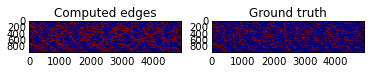

jaccard score is  0.470961674564
f1 score is 0.6459543436


In [108]:
#load the results
comp_im=np.load('output_whole.npy')
label_im=np.load('y_whole.npy')

#initialize the arrays
k=0

#create a .jpeg image needed by mahotas for the watershed
misc.imsave('comp_im.jpg', comp_im[k])
misc.imsave('label.jpg', label_im[k])

#create the watershed images
comp_im_TF = watershed('comp_im.jpg')
label_TF = watershed('label.jpg')

#counter for which picture we want to look at
for k in range(1, 5):

    #create a .jpeg image needed by mahotas for the watershed
    misc.imsave('comp_im.jpg', comp_im[k])
    misc.imsave('label.jpg', label_im[k])

    #create the watershed images
    comp_im_TF = np.concatenate((comp_im_TF, watershed('comp_im.jpg')), axis=1)
    label_TF = np.concatenate((label_TF, watershed('label.jpg')), axis=1)

#plotting
plt.subplot(121)
pylab.imshow(comp_im_TF)
plt.title('Computed edges')
plt.subplot(122)
pylab.imshow(label_TF)
plt.title('Ground truth')
plt.show()

#compute and print the jaccard score and the f1 score
print 'jaccard score is ', jaccard_similarity_score(label_TF, comp_im_TF)
print 'f1 score is', f1_score(label_TF, comp_im_TF, labels=None, pos_label=1, sample_weight=None)

In [109]:
?mh.cwatershed

In [110]:
?mh.thresholding.bernsen

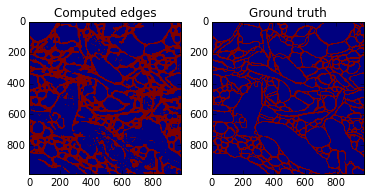

In [111]:
#initialize the arrays
k=0

#create a .jpeg image needed by mahotas for the watershed
misc.imsave('comp_im.jpg', comp_im[k])
misc.imsave('label.jpg', label_im[k])

#create the watershed images
comp_im_TF = watershed('comp_im.jpg')
label_TF = watershed('label.jpg')

#plotting
plt.subplot(121)
pylab.imshow(comp_im_TF)
plt.title('Computed edges')
plt.subplot(122)
pylab.imshow(label_TF)
plt.title('Ground truth')
plt.show()